In [12]:
# This file perform transformations on different channels and plot the flow cytometry relationship 

In [13]:
import os
import glob
import pandas as pd
import bokeh
from bokeh.plotting import show
import matplotlib.pyplot as plt
import numpy as np
import flowkit as fk

bokeh.io.output_notebook()
%matplotlib inline

_ = plt.ioff()

Loading BokehJS ...

In [14]:
# load fcs file 
fcs_path = '/Users/gloriah/Desktop/STUDY/Internship WEHI/Genomics-Metadata-Multiplexing-main/Design 1/fcs_files/11Dec18_INX_Plate136.fcs'
# fcs_path = '/Users/gloriah/Desktop/STUDY/Internship WEHI/Genomics-Metadata-Multiplexing-main/Data/FACS Data/Index files/14Jun23_INX_NKC 084_LCE662.fcs'
sample = fk.Sample(fcs_path)

In [15]:
sample.channels

,channel_number,pnn,pns,png,pne,pnr
0,1,Time,,0.01,"(0.0, 0.0)",262144.0
1,2,FSC-A,,1.00,"(0.0, 0.0)",262144.0
2,3,FSC-H,,1.00,"(0.0, 0.0)",262144.0
3,4,SSC-A,,1.00,"(0.0, 0.0)",262144.0
4,5,SSC-H,,1.00,"(0.0, 0.0)",262144.0
5,6,B695/40-A,7AAD,1.00,"(0.0, 0.0)",262144.0
6,7,R660/20-A,APC,1.00,"(0.0, 0.0)",262144.0
7,8,R730/45-A,A700,1.00,"(0.0, 0.0)",262144.0
8,9,R780/60-A,APC-Cy7,1.00,"(0.0, 0.0)",262144.0
9,10,Y582/15-A,PE,1.00,"(0.0, 0.0)",262144.0


In [16]:
sample.pnn_labels

['Time',
 'FSC-A',
 'FSC-H',
 'SSC-A',
 'SSC-H',
 'B695/40-A',
 'R660/20-A',
 'R730/45-A',
 'R780/60-A',
 'Y582/15-A',
 'Y780/60-A',
 'V450/50-A']

In [24]:
# Fluoro channel Transformation select
# options: 'logical', 'biex', 'asinh'
Transform = 'asinh'

# Allocate transformation for different channels 
labels = sample.pnn_labels
transform_dict = {}

# selected transformation for fluoro channel 
for label_index in sample.fluoro_indices:
    label = labels[label_index]
    if Transform == 'biex':
        transform_dict[label] =  fk.transforms.WSPBiexTransform(label, max_value=262144.000029, positive=4.418540, width=-100, negative=0)
    elif Transform == 'asinh':
        transform_dict[label] = fk.transforms.AsinhTransform(label, param_t=262144, param_m=4.0, param_a=0.0)
    elif Transform == 'logicle':
        transform_dict[label] = fk.transforms.LogicleTransform(label,param_t= 262144.0, param_w= 1.0, param_m=4.4185399, param_a=0.0)

# linear transformtion with (param_t= 262144.0, param_a=0.0) for scatter channel
for label_index in sample.scatter_indices:
    label = labels[label_index]
    transform_dict[label] = fk.transforms.LinearTransform(label,param_t= 262144.0, param_a=0.0)

# linear transformation with (label,param_t= 69.0, param_a=1.2746832452) for time
label_time = labels[sample.time_index]
transform_dict[label_time] = fk.transforms.LinearTransform(label,param_t= 69.0, param_a=1.2746832452)  

# apply transformation
sample.apply_transform(transform_dict)   


In [25]:
sample.as_dataframe(source='xform')

pnn,Time,FSC-A,FSC-H,SSC-A,SSC-H,B695/40-A,R660/20-A,R730/45-A,R780/60-A,Y582/15-A,Y780/60-A,V450/50-A
pns,,,,,,7AAD,APC,A700,APC-Cy7,PE,PE-Cy7,BV421
0,0.167979,0.544052,0.316605,0.386068,0.244282,0.359063,0.770542,0.635249,0.710931,0.642557,0.672087,0.262634
1,0.200879,0.487003,0.324852,0.279863,0.178490,0.390654,0.649186,0.527479,0.625206,0.671947,0.667211,0.233741
2,0.227674,0.583908,0.321415,0.408590,0.255394,0.346418,0.652684,0.534490,0.652026,0.636946,0.676246,0.299023
3,0.257585,0.563137,0.345581,0.362055,0.213329,0.389134,0.645110,0.512967,0.628597,0.629577,0.621488,0.248944
4,0.290598,0.583214,0.371738,0.272245,0.166328,0.222336,0.651460,0.529025,0.659213,0.460215,0.558433,0.277093
...,...,...,...,...,...,...,...,...,...,...,...,...
367,17.731915,0.579552,0.364922,0.358498,0.225018,-0.250543,0.676127,0.523894,0.525965,0.244892,0.744731,0.737800
368,17.771545,0.536224,0.359661,0.267858,0.195202,-0.321727,0.707502,0.542180,0.570546,0.332214,0.806322,0.477680
369,17.803434,0.600197,0.363575,0.288831,0.160030,0.351221,0.710349,0.566730,0.530444,0.284392,0.581637,0.467259


In [26]:
sample.export('test.csv', source='xform', exclude_neg_scatter=False, exclude_flagged=False, exclude_normal=False, subsample=False, include_metadata=False, directory=None)

In [27]:
## Channel Select (pnn name)
X_axis = 'R730/45-A'
Y_axis = 'R780/60-A'

## Scatter plot with raw data
p = sample.plot_scatter(X_axis,Y_axis,source='raw',subsample=True)
show(p)

In [28]:
# Scatter plot with transformed data
p_xform = sample.plot_scatter(X_axis,Y_axis,source='xform', subsample=True)
show(p_xform)

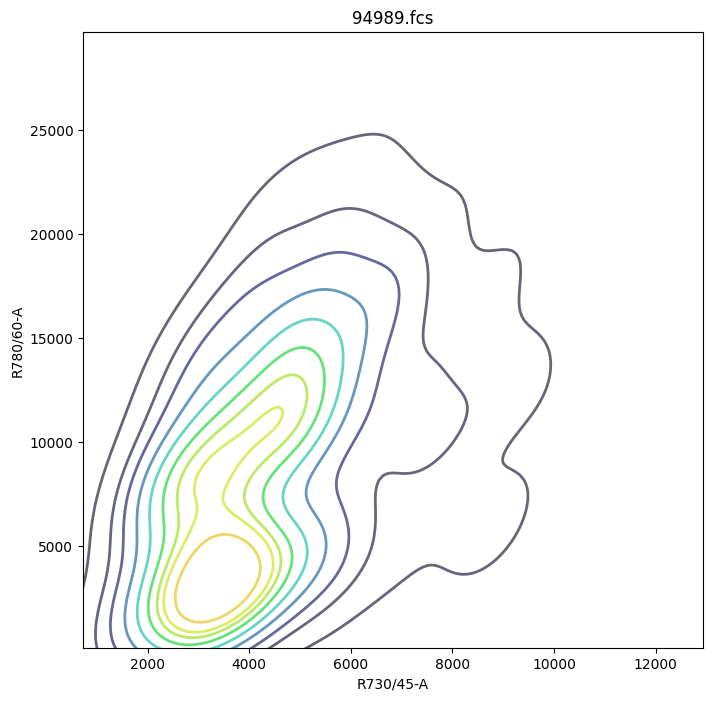

In [22]:
# Contour plot
p_con = sample.plot_contour(X_axis,Y_axis, source='raw')
plt.show(p_con)